XYZ is a courier company. As we appreciate that human capital plays an important role in collection, transportation and delivery. The company is passing through genuine issue of Absenteeism. The company has shared it dataset and requested to have an answer on the following areas: 
1. What changes company should bring to reduce the number of absenteeism? 
2. How much losses every month can we project in 2011 if same trend of absenteeism continues?



In [1]:
#Import libraries
import os
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from fancyimpute import KNN
from sklearn.metrics import mean_squared_error




Using TensorFlow backend.


In [2]:
#import libraries for plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Setting working directory
os.chdir("C:/Users/HP/Desktop/edwisor/Project 1")


# Loading data
emp_df = pd.read_excel("Absenteeism_at_work_Project.xls")

Exploratory Data Analysis

In [4]:
emp_df.dtypes

ID                                   int64
Reason for absence                 float64
Month of absence                   float64
Day of the week                      int64
Seasons                              int64
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure               float64
Education                          float64
Son                                float64
Social drinker                     float64
Social smoker                      float64
Pet                                float64
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtype: object

In [5]:
#first five rows
emp_df.head(5)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [6]:
#Dimension
emp_df.shape

(740, 21)

In [7]:
# Number of Unique values present in each variable
emp_df.nunique()

ID                                 36
Reason for absence                 28
Month of absence                   13
Day of the week                     5
Seasons                             4
Transportation expense             24
Distance from Residence to Work    25
Service time                       18
Age                                22
Work load Average/day              38
Hit target                         13
Disciplinary failure                2
Education                           4
Son                                 5
Social drinker                      2
Social smoker                       2
Pet                                 6
Weight                             26
Height                             14
Body mass index                    17
Absenteeism time in hours          19
dtype: int64

In [8]:
emp_df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [9]:
# From the EDA and problem statement file categorising the variables in two category " Continuos" and "Categorical"
continuous_vars = ['Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Transportation expense',
       'Hit target', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']

categorical_vars = ['ID','Reason for absence','Month of absence','Day of the week',
                     'Seasons','Disciplinary failure', 'Education', 'Social drinker',
                     'Social smoker', 'Pet', 'Son']

In [10]:
#Make a copy of dataframe
df_copy = emp_df.copy()

Pre Processing

In [11]:
# Missing value Analysis
emp_df.isna().sum()
Missing_Value = pd.DataFrame((emp_df.isna().sum()/len(emp_df)*100))
Missing_Value.reset_index()
Missing_Value = Missing_Value.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})
#Arranging Missing Values in Decreasing Order
Missing_Value = Missing_Value.sort_values('Missing_percentage', ascending = False)
Missing_Value

,Missing_percentage
Body mass index,4.189189
Absenteeism time in hours,2.972973
Height,1.891892
Work load Average/day,1.351351
Education,1.351351
Transportation expense,0.945946
Son,0.810811
Disciplinary failure,0.810811
Hit target,0.810811
Social smoker,0.540541


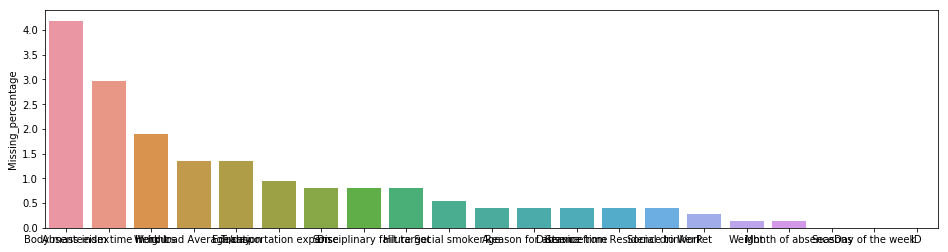

In [12]:
fig_size = plt.rcParams['figure.figsize']
fig_size[0] = 16
fig_size[1] = 4
plt.rcParams['figure.figsize'] = fig_size
sns.barplot(x=Missing_Value.index,y='Missing_percentage',data=Missing_Value)

Using ID to impute Distance from Residence to Work

In [13]:
df = emp_df[emp_df['Distance from Residence to Work'].isna() == True]['ID']
print(df)
for i in df:
    emp_df.loc[(emp_df['Distance from Residence to Work'].isnull()) & (emp_df['ID']==i),\
'Distance from Residence to Work'] = emp_df.loc[emp_df['ID']==i,'Distance from Residence to Work'].mean()

45    34
65    22
81    28
Name: ID, dtype: int64


Using ID to impute Transportation expense

In [14]:
df = emp_df[emp_df['Transportation expense'].isna() == True]['ID']
print(df)
for i in df:
    emp_df.loc[(emp_df['Transportation expense'].isnull()) & (emp_df['ID']==i),\
'Transportation expense'] = emp_df.loc[emp_df['ID']==i,'Transportation expense'].mean()

6     10
16     3
32     1
49    15
50    20
65    22
79    20
Name: ID, dtype: int64


Using ID to impute Service time

In [15]:
df = emp_df[emp_df['Service time'].isna() == True]['ID']
print(df)
for i in df:
    emp_df.loc[(emp_df['Service time'].isnull()) & (emp_df['ID']==i),\
'Service time'] = emp_df.loc[emp_df['ID']==i,'Service time'].mean()

106    28
115    34
131    34
Name: ID, dtype: int64


Using ID to impute Age

In [16]:
df = emp_df[emp_df['Age'].isna() == True]['ID']
print(df)
for i in df:
    emp_df.loc[(emp_df['Age'].isnull()) & (emp_df['ID']==i),\
'Age'] = emp_df.loc[emp_df['ID']==i,'Age'].mean()

112    28
220    24
224    24
Name: ID, dtype: int64


Using ID to impute Education

In [17]:
df = emp_df[emp_df['Education'].isna() == True]['ID']
print(df)
for i in df:
    emp_df.loc[(emp_df['Education'].isnull()) & (emp_df['ID']==i),\
'Education'] = emp_df.loc[emp_df['ID']==i,'Education'].mean()

77     11
109    10
110    34
115    34
116    14
127    34
128    34
131    34
268    10
274    24
Name: ID, dtype: int64


Using ID to impute  Son

In [18]:
df = emp_df[emp_df['Son'].isna() == True]['ID']
print(df)
for i in df:
    emp_df.loc[(emp_df['Son'].isnull()) & (emp_df['ID']==i),\
'Son'] = emp_df.loc[emp_df['ID']==i,'Son'].mean()

79     20
85     14
125    34
131    34
137    27
350     1
Name: ID, dtype: int64


Using ID to impute Social drinker

In [19]:
df = emp_df[emp_df['Social drinker'].isna() == True]['ID']
print(df)
for i in df:
    emp_df.loc[(emp_df['Social drinker'].isnull()) & (emp_df['ID']==i),\
'Social drinker'] = emp_df.loc[emp_df['ID']==i,'Social drinker'].mean()

78    10
85    14
91    17
Name: ID, dtype: int64


Using ID to impute Social smoker

In [20]:
df = emp_df[emp_df['Social smoker'].isna() == True]['ID']
print(df)
for i in df:
    emp_df.loc[(emp_df['Social smoker'].isnull()) & (emp_df['ID']==i),\
'Social smoker'] = emp_df.loc[emp_df['ID']==i,'Social smoker'].mean()

114    34
267     1
272    11
275    15
Name: ID, dtype: int64


Using ID to impute Pet

In [21]:
df = emp_df[emp_df['Pet'].isna() == True]['ID']
print(df)
for i in df:
    emp_df.loc[(emp_df['Pet'].isnull()) & (emp_df['ID']==i),\
'Pet'] = emp_df.loc[emp_df['ID']==i,'Pet'].mean()

267     1
517    13
Name: ID, dtype: int64


Using ID to impute Weight

In [22]:
df = emp_df[emp_df['Weight'].isna() == True]['ID']
print(df)
for i in df:
    emp_df.loc[(emp_df['Weight'].isnull()) & (emp_df['ID']==i),\
'Weight'] = emp_df.loc[emp_df['ID']==i,'Weight'].mean()

118    27
Name: ID, dtype: int64


Using ID to impute Height

In [23]:
df = emp_df[emp_df['Height'].isna() == True]['ID']
print(df)
for i in df:
    emp_df.loc[(emp_df['Height'].isnull()) & (emp_df['ID']==i),\
'Height'] = emp_df.loc[emp_df['ID']==i,'Height'].mean()
    
   

74     20
109    10
113    28
114    34
131    34
132    27
268    10
272    11
273     5
504    22
505    13
509    24
510    32
518    28
Name: ID, dtype: int64


Using ID to impute Body mass index

In [24]:
df = emp_df[emp_df['Body mass index'].isna() == True]['ID']
print(df)
for i in df:
    emp_df.loc[(emp_df['Body mass index'].isnull()) & (emp_df['ID']==i),\
'Body mass index'] = emp_df.loc[emp_df['ID']==i,'Body mass index'].mean()

14      3
15     24
24     11
27     30
31      2
37     19
41     34
42      3
52     28
53     34
56     28
57      3
58     13
64     36
77     11
89     14
99     34
100    36
106    28
107    20
108    28
146    28
152    18
153    28
158    17
159    15
160    20
161    22
220    24
272    11
273     5
Name: ID, dtype: int64


In [25]:
emp_df.isna().sum()

ID                                  0
Reason for absence                  3
Month of absence                    1
Day of the week                     0
Seasons                             0
Transportation expense              0
Distance from Residence to Work     0
Service time                        0
Age                                 0
Work load Average/day              10
Hit target                          6
Disciplinary failure                6
Education                           0
Son                                 0
Social drinker                      0
Social smoker                       0
Pet                                 0
Weight                              0
Height                              0
Body mass index                     0
Absenteeism time in hours          22
dtype: int64

For other variables, we can impute missing variables through mean, median or KNN imputation. We need to select the best method.

In [26]:
#Actual value = 1
#Mean = 19.183423913043477
#Median = 23  
#KNN = 3.4878048780487805
print(emp_df['Reason for absence'].iloc[10])

#Set the value of first row in Reason for absence as NAN
#create missing value
emp_df['Reason for absence'].iloc[10] = np.nan

1.0


C:\Users\tanis\AnacondaNew\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [27]:
#Impute with mean
#emp_df['Reason for absence'] = emp_df['Reason for absence'].fillna(emp_df['Reason for absence'].mean())

#Impute with median
#emp_df['Reason for absence'].iloc[7] = np.nan
#emp_df['Reason for absence'] = emp_df['Reason for absence'].fillna(emp_df['Reason for absence'].median())

#Apply KNN imputation algorithm
emp_df = pd.DataFrame(KNN(k = 3).fit_transform(emp_df), columns = emp_df.columns)
emp_df['Reason for absence'].iloc[10]

Imputing row 1/740 with 0 missing, elapsed time: 0.154
Imputing row 101/740 with 0 missing, elapsed time: 0.157
Imputing row 201/740 with 0 missing, elapsed time: 0.158
Imputing row 301/740 with 0 missing, elapsed time: 0.160
Imputing row 401/740 with 0 missing, elapsed time: 0.161
Imputing row 501/740 with 0 missing, elapsed time: 0.162
Imputing row 601/740 with 0 missing, elapsed time: 0.164
Imputing row 701/740 with 0 missing, elapsed time: 0.165


3.4878048780487805

So KNN is the best method to impute mising values

In [28]:
emp_df.isna().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

Data Conversion

In [29]:
#converting appropriate categorical variable into actual categorical variable 

emp_df['ID']=emp_df['ID'].astype('category')
emp_df['Reason for absence']=emp_df['Reason for absence'].astype('category')
emp_df['Month of absence']=emp_df['Month of absence'].astype('category')
emp_df['Day of the week']=emp_df['Day of the week'].astype('category')
emp_df['Seasons']=emp_df['Seasons'].astype('category')
emp_df['Disciplinary failure']=emp_df['Disciplinary failure'].astype('category')
emp_df['Education']=emp_df['Education'].astype('category')
emp_df['Son']=emp_df['Son'].astype('category')
emp_df['Social drinker']=emp_df['Social drinker'].astype('category')
emp_df['Social smoker']=emp_df['Social smoker'].astype('category')
emp_df['Pet']=emp_df['Pet'].astype('category')

In [30]:
emp_df.dtypes

ID                                 category
Reason for absence                 category
Month of absence                   category
Day of the week                    category
Seasons                            category
Transportation expense              float64
Distance from Residence to Work     float64
Service time                        float64
Age                                 float64
Work load Average/day               float64
Hit target                          float64
Disciplinary failure               category
Education                          category
Son                                category
Social drinker                     category
Social smoker                      category
Pet                                category
Weight                              float64
Height                              float64
Body mass index                     float64
Absenteeism time in hours           float64
dtype: object

Univarant and Bivariant

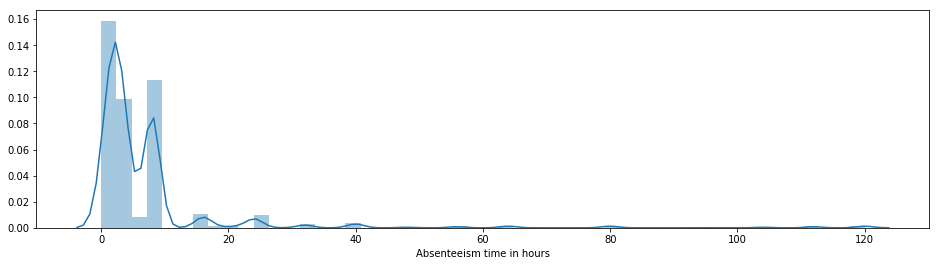

In [31]:
#Check whether target variable is normal or not
sns.distplot(emp_df['Absenteeism time in hours']);

In [32]:
print("Skewness: %f" % emp_df['Absenteeism time in hours'].skew())
print("Kurtosis: %f" % emp_df['Absenteeism time in hours'].kurt())

Skewness: 5.696584
Kurtosis: 38.569771


C:\Users\tanis\AnacondaNew\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


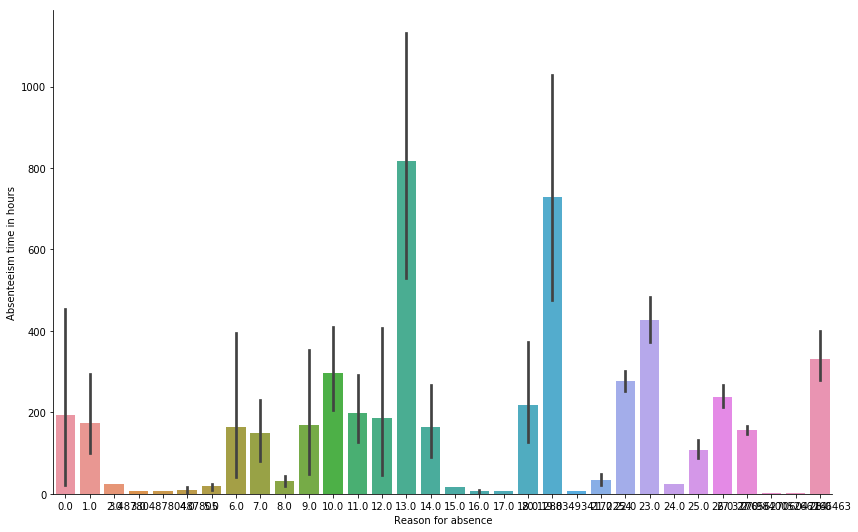

In [33]:
#Reason for absence VS Absenteeism time in hours
sns.factorplot(x='Reason for absence', y="Absenteeism time in hours", kind= 'bar',data=emp_df,height=7.5,aspect=12/7.5,estimator=np.sum)

Seasons VS Absenteeism with hue = 'Day of the Week'

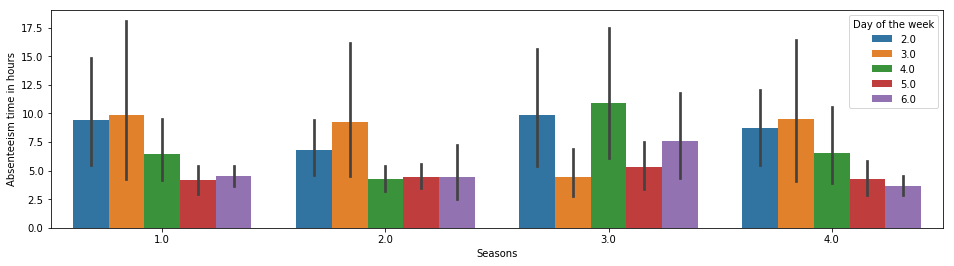

In [34]:
sns.barplot(x='Seasons',y='Absenteeism time in hours',data=emp_df,hue = 'Day of the week')

Disciplinary Failure VS Absenteesim time in hours

C:\Users\tanis\AnacondaNew\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


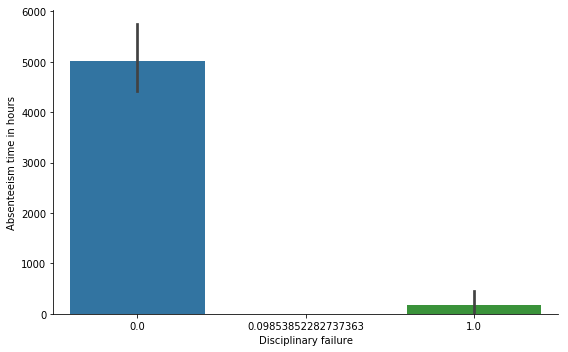

In [35]:
sns.factorplot(x='Disciplinary failure', y="Absenteeism time in hours", kind= 'bar',data=emp_df,height=5,aspect=12/7.5,estimator=np.sum)

Education VS Absenteesim time in hours

C:\Users\tanis\AnacondaNew\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


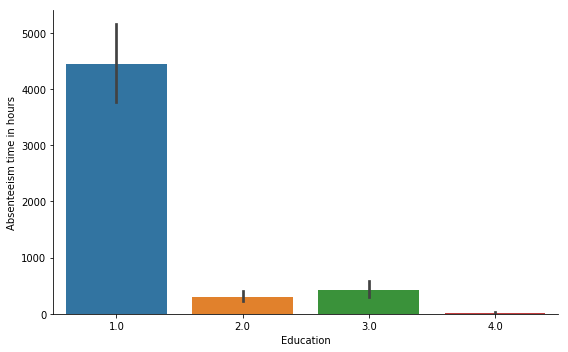

In [36]:
sns.factorplot(x='Education', y="Absenteeism time in hours", kind= 'bar',data=emp_df,height=5,aspect=12/7.5,estimator=np.sum)

Hit Target VS Absenteeism time in hours

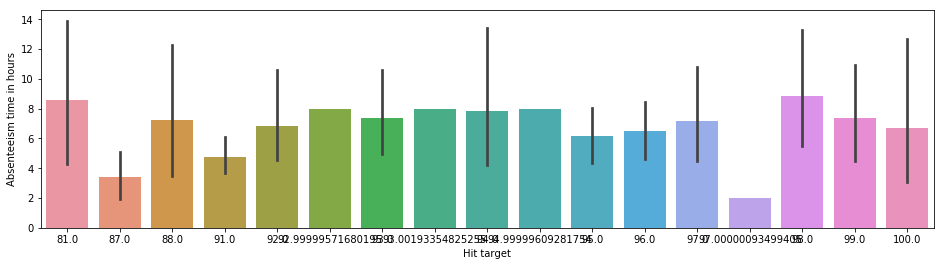

In [37]:
sns.barplot(x='Hit target',y='Absenteeism time in hours',data=emp_df)

In [38]:
#fig_size = plt.rcParams['figure.figsize']
#fig_size[0] = 11
#fig_size[1] = 5
#plt.rcParams['figure.figsize'] = fig_size

In [39]:
#Loss per month
#sum = list(emp_df.groupby(['Month of absence'])['Absenteeism time in hours'].agg('sum'))
#del sum[0]
#del sum[9]
#sum
#month = list(range(1,13))
#month
#loss_df=pd.DataFrame({'Month':month,'Loss':sum})
#loss_df
#sns.barplot(x='Month',y='Loss',data=loss_df)

In [40]:
fig_size = plt.rcParams['figure.figsize']
fig_size[0] = 25
fig_size[1] = 20
plt.rcParams['figure.figsize'] = fig_size

Outliers Analysis

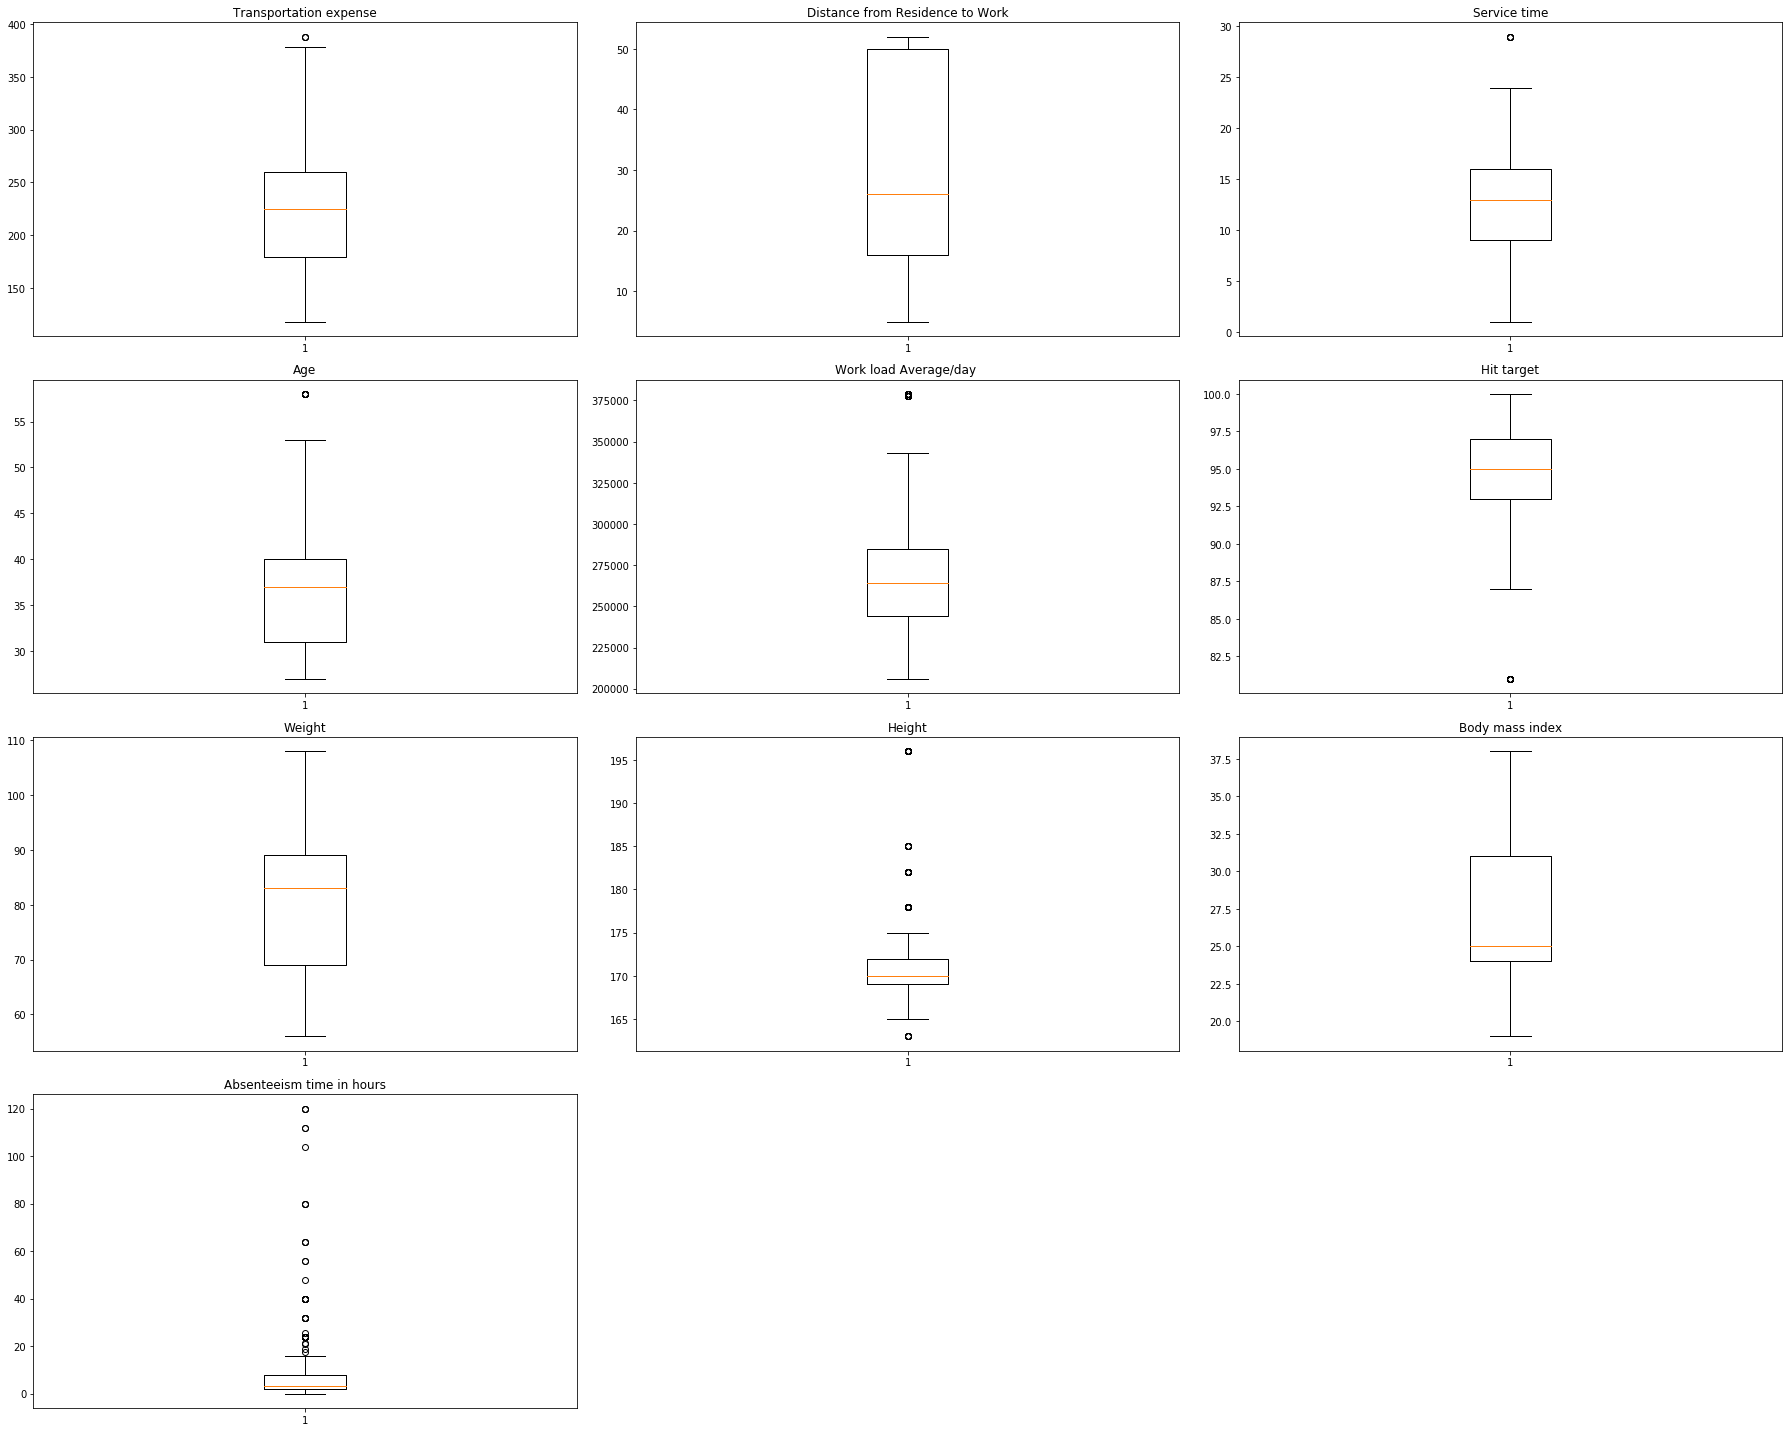

In [41]:
######################################### Outlier Analysis ####################################################

plt.subplot(4,3,1)
plt.boxplot(emp_df['Transportation expense'])
plt.title('Transportation expense')

plt.subplot(4,3,2)
plt.boxplot(emp_df['Distance from Residence to Work'])
plt.title('Distance from Residence to Work')

plt.subplot(4,3,3)
plt.boxplot(emp_df['Service time'])
plt.title('Service time')

plt.subplot(4,3,4)
plt.boxplot(emp_df['Age'])
plt.title('Age')

plt.subplot(4,3,5)
plt.boxplot(emp_df['Work load Average/day '])
plt.title('Work load Average/day ')

plt.subplot(4,3,6)
plt.boxplot(emp_df['Hit target'])
plt.title('Hit target')

plt.subplot(4,3,7)
plt.boxplot(emp_df['Weight'])
plt.title('Weight')

plt.subplot(4,3,8)
plt.boxplot(emp_df['Height'])
plt.title('Height')

plt.subplot(4,3,9)
plt.boxplot(emp_df['Body mass index'])
plt.title('Body mass index')

plt.subplot(4,3,10)
plt.boxplot(emp_df['Absenteeism time in hours'])
plt.title('Absenteeism time in hours')

plt.tight_layout()
#We have outlerss in most of the variables

In [42]:
#Deleting Outliers
cname = ['Transportation expense','Distance from Residence to Work', 'Service time','Age','Work load Average/day ','Hit target','Weight','Height','Body mass index','Absenteeism time in hours']
numeric_data = emp_df[cname]
         
for i in cname:
    print(i)
    q75, q25 = np.percentile(emp_df.loc[:,i],[75,25])
    iqr = q75- q25
    min = q25 - (1.5*iqr)
    max = q75 + (1.5*iqr)
    
    emp_df.loc[emp_df.loc[:,i] < min , i] = np.nan
    emp_df.loc[emp_df.loc[:,i] > max , i] = np.nan   
    


Transportation expense
Distance from Residence to Work
Service time
Age
Work load Average/day 
Hit target
Weight
Height
Body mass index
Absenteeism time in hours


In [43]:
pd.isnull(emp_df).sum() #after deletion we have 233 Missing values

ID                                   0
Reason for absence                   0
Month of absence                     0
Day of the week                      0
Seasons                              0
Transportation expense               3
Distance from Residence to Work      0
Service time                         5
Age                                  8
Work load Average/day               31
Hit target                          19
Disciplinary failure                 0
Education                            0
Son                                  0
Social drinker                       0
Social smoker                        0
Pet                                  0
Weight                               0
Height                             119
Body mass index                      0
Absenteeism time in hours           48
dtype: int64

Impute missing value through KNN imputation

In [44]:
#Apply KNN imputation algorithm
emp_df = pd.DataFrame(KNN(k = 3).fit_transform(emp_df), columns = emp_df.columns)

Imputing row 1/740 with 0 missing, elapsed time: 0.142
Imputing row 101/740 with 1 missing, elapsed time: 0.144
Imputing row 201/740 with 0 missing, elapsed time: 0.145
Imputing row 301/740 with 0 missing, elapsed time: 0.147
Imputing row 401/740 with 0 missing, elapsed time: 0.148
Imputing row 501/740 with 0 missing, elapsed time: 0.149
Imputing row 601/740 with 0 missing, elapsed time: 0.149
Imputing row 701/740 with 0 missing, elapsed time: 0.151


In [45]:
pd.isnull(emp_df).sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

Feature Selection

In [46]:
emp_df.to_excel("new_employee.xlsx",index=False)

#correlation graph for continous variables
#Get dataframe with all continuous variables
df_corr = emp_df.loc[:,continuous_vars]

[]

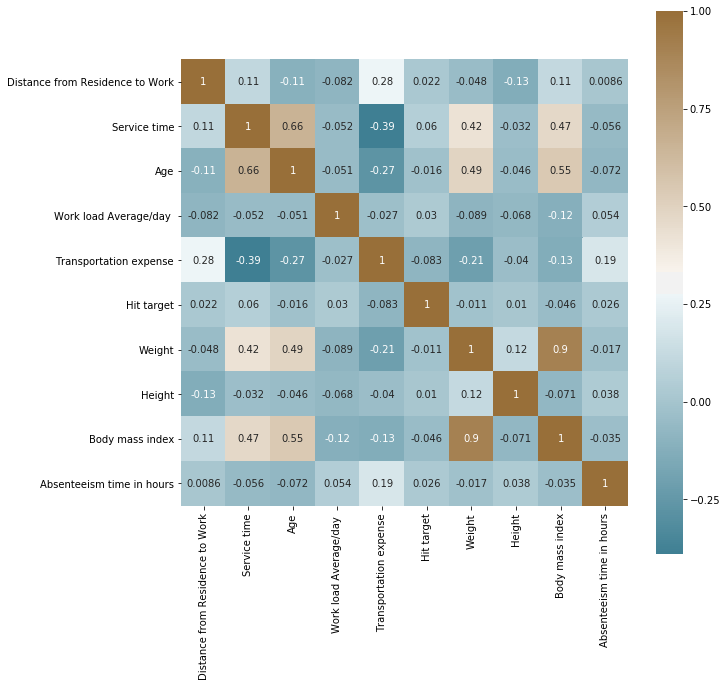

In [47]:
#Check for multicollinearity using corelation graph
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(10, 10))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 50, as_cmap=True),
            square=True, ax=ax, annot = True)
plt.plot()

In [48]:
#Variable Reduction
to_drop = ['Body mass index','Service time']
emp_df = emp_df.drop(to_drop, axis = 1)

In [49]:
# Updating the Continuous and Categorical Variables
continuous_vars.remove('Body mass index')
continuous_vars.remove('Service time')


In [50]:
#Make a copy of clean data 
clean_data = emp_df.copy()
#emp_df = clean_data

In [51]:
# now let us see anova test for categorical varibles

In [52]:
#loop for ANOVA test Since the target variable is continuous
from scipy import stats

In [53]:
#loop for ANOVA test Since the target variable is continuous
for i in categorical_vars:
   f, p = stats.f_oneway(emp_df[i], emp_df["Absenteeism time in hours"])
   print("P value for variable "+str(i)+" is "+str(p))

P value for variable ID is 5.337729562534981e-173
P value for variable Reason for absence is 2.9066452271213244e-275
P value for variable Month of absence is 1.9931026466514934e-27
P value for variable Day of the week is 0.0008465564341556336
P value for variable Seasons is 1.3056677010847954e-41
P value for variable Disciplinary failure is 1.5347083529549863e-193
P value for variable Education is 4.47678144437648e-110
P value for variable Social drinker is 2.6537813380159558e-157
P value for variable Social smoker is 5.695644778444439e-192
P value for variable Pet is 2.4936440768728218e-132
P value for variable Son is 2.0082305982459005e-120


In [54]:
#we see that reason of absense has valuess less than 0.05, rest all are above 0.05 so we drop all varibles except reason of absense
#we want to know loss per month so we are not droping Month of absence

In [55]:
emp_df=emp_df.drop(['ID','Seasons','Pet','Son','Social drinker','Day of the week','Disciplinary failure','Education','Social smoker'],axis=1)

In [56]:
categorical_vars.remove('ID')
categorical_vars.remove('Seasons')
categorical_vars.remove('Pet')
categorical_vars.remove('Son')
categorical_vars.remove('Social drinker')
categorical_vars.remove('Day of the week')
categorical_vars.remove('Disciplinary failure')
categorical_vars.remove('Education')
categorical_vars.remove('Social smoker')

In [57]:
emp_df.head(10)

,Reason for absence,Month of absence,Transportation expense,Distance from Residence to Work,Age,Work load Average/day,Hit target,Weight,Height,Absenteeism time in hours
0,26.0,7.0,289.0,36.0,33.0,239554.0,97.0,90.0,172.000000,4.000000
1,0.0,7.0,118.0,13.0,50.0,239554.0,97.0,98.0,170.000009,0.000000
2,23.0,7.0,179.0,51.0,38.0,239554.0,97.0,89.0,170.000000,2.000000
3,7.0,7.0,279.0,5.0,39.0,239554.0,97.0,68.0,168.000000,4.000000
4,23.0,7.0,289.0,36.0,33.0,239554.0,97.0,90.0,172.000000,2.000000
5,23.0,7.0,179.0,51.0,38.0,239554.0,97.0,89.0,170.000000,2.000010
6,22.0,7.0,361.0,52.0,28.0,239554.0,97.0,80.0,172.000000,8.000000
7,23.0,7.0,260.0,50.0,36.0,239554.0,97.0,65.0,168.000000,4.000000
8,19.0,7.0,155.0,12.0,34.0,239554.0,97.0,95.0,168.978750,3.137931
9,22.0,7.0,235.0,11.0,37.0,239554.0,97.0,88.0,172.000000,8.000000


Feature Scaling

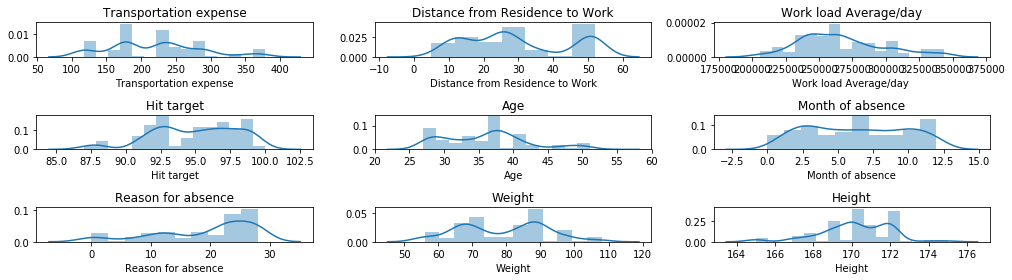

In [58]:
#we see that the data is skewed
#Scaling for Continious variable 
plt.figure(figsize=(14,4))

plt.subplot(3,3,1)
sns.distplot(emp_df['Transportation expense'])
plt.title('Transportation expense')

plt.subplot(3,3,2)
sns.distplot(emp_df['Distance from Residence to Work'])
plt.title('Distance from Residence to Work')

plt.subplot(3,3,3)
sns.distplot(emp_df['Work load Average/day '])
plt.title('Work load Average/day')

plt.subplot(3,3,4)
sns.distplot(emp_df['Hit target'])
plt.title('Hit target')
                  
plt.subplot(3,3,5)
sns.distplot(emp_df['Age'])
plt.title('Age')
                
plt.subplot(3,3,6)
sns.distplot(emp_df['Month of absence'])
plt.title('Month of absence')

plt.subplot(3,3,7)
sns.distplot(emp_df['Reason for absence'])
plt.title('Reason for absence')
                  
plt.subplot(3,3,8)
sns.distplot(emp_df['Weight'])
plt.title('Weight')
                  
plt.subplot(3,3,9)
sns.distplot(emp_df['Height'])
plt.title('Height')                  
                  

plt.tight_layout()

In [59]:
#Normalization of continuous variables
for i in continuous_vars:
    if i == 'Absenteeism time in hours':
        continue
    emp_df[i] = (emp_df[i] - emp_df[i].min())/(emp_df[i].max()-emp_df[i].min())

In [60]:
#Create dummy variables of factor variables
emp_df = pd.get_dummies(data = emp_df, columns = categorical_vars)

# Copying dataframe
df1 = emp_df.copy()

Modelling

In [61]:
#Splitting data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( emp_df.iloc[:, emp_df.columns != 'Absenteeism time in hours'],emp_df.iloc[:, 8], test_size = 0.20, random_state = 1)

Decison Tree

In [62]:
# Importing libraries for Decision Tree 
from sklearn.tree import DecisionTreeRegressor

#Build decsion tree using DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state = 1).fit(X_train,y_train)

#Perdict for test cases
dt_predictions = dt_model.predict(X_test)

#Create data frame for actual and predicted values
df_dt = pd.DataFrame({'actual': y_test, 'pred': dt_predictions})
print(df_dt.head())

#Define function to calculate RMSE
def RMSE(y_actual,y_predicted):
    rmse = np.sqrt(mean_squared_error(y_actual,y_predicted))
    return rmse

#Calculate RMSE and R-squared value
print("Root Mean Squared Error: "+str(RMSE(y_test, dt_predictions)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, dt_predictions)))

     actual  pred
681       0   0.0
257       0   0.0
527       0   0.0
637       0   0.0
429       0   0.0
Root Mean Squared Error: 0.0
R^2 Score(coefficient of determination) = 1.0


In [63]:
# Importing libraries for Random Forest
from sklearn.ensemble import RandomForestRegressor

#Build random forest using RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 500, random_state = 1).fit(X_train,y_train)

#Perdict for test cases
rf_predictions = rf_model.predict(X_test)

#Create data frame for actual and predicted values
df_rf = pd.DataFrame({'actual': y_test, 'pred': rf_predictions})
print(df_rf.head())

#Calculate RMSE and R-squared value
print("Root Mean Squared Error: "+str(RMSE(y_test, rf_predictions)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, rf_predictions)))

     actual  pred
681       0   0.0
257       0   0.0
527       0   0.0
637       0   0.0
429       0   0.0
Root Mean Squared Error: 0.0
R^2 Score(coefficient of determination) = 1.0


In [64]:
# Importing libraries for Linear Regression
from sklearn.linear_model import LinearRegression

#Train the model
lr_model = LinearRegression().fit(X_train , y_train)

#Perdict for test cases
lr_predictions = lr_model.predict(X_test)

#Create data frame for actual and predicted values
df_lr = pd.DataFrame({'actual': y_test, 'pred': lr_predictions})
print(df_lr.head())

#Calculate RMSE and R-squared value
print("Root Mean Squared Error: "+str(RMSE(y_test, lr_predictions)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, lr_predictions)))

     actual          pred
681       0  2.081668e-17
257       0 -3.955170e-16
527       0  9.714451e-17
637       0  6.245005e-17
429       0  1.040834e-16
Root Mean Squared Error: 0.0038079261546397607
R^2 Score(coefficient of determination) = 0.9995557837675124


In [65]:
#Get the target variable
target = emp_df['Absenteeism time in hours']

In [66]:
#Get the number of rows and columns of data
emp_df.shape

(740, 54)

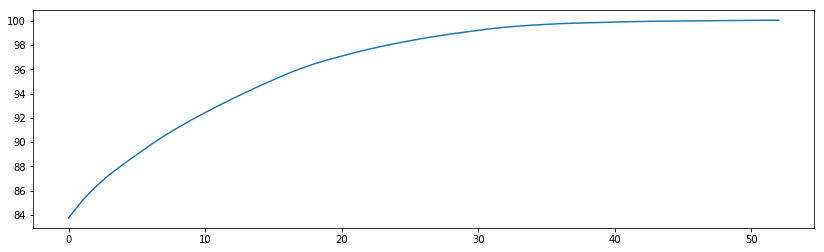

In [67]:
#Import library for PCA
from sklearn.decomposition import PCA

plt.figure(figsize=(14,4))
#Converting data to numpy array
X = emp_df.values

#Data has 54 variables so no of components of PCA = 53
pca = PCA(n_components=53)
pca.fit(X)

#Proportion of variance explained
var= pca.explained_variance_ratio_

#Cumulative scree plot
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

#Draw the plot
plt.plot(var1)
plt.show()

In [68]:
#Selecting 20 components since it explains almost 95+ % data variance
pca = PCA(n_components=20)

#Fitting the selected components to the data
pca.fit(X)

#Splitting data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,target, test_size=0.2, random_state = 1)

In [69]:
#Build decsion tree using DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state = 1).fit(X_train,y_train)

#Perdict for test cases
dt_predictions = dt_model.predict(X_test)

#Create data frame for actual and predicted values
df_dt = pd.DataFrame({'actual': y_test, 'pred': dt_predictions})
print(df_dt.head())

#Calculate RMSE and R-squared value
print("Root Mean Squared Error: "+str(RMSE(y_test, dt_predictions)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, dt_predictions)))

     actual  pred
681     8.0   8.0
257     2.0   2.0
527     8.0   8.0
637     8.0   8.0
429     4.0   4.0
Root Mean Squared Error: 0.03314443040693673
R^2 Score(coefficient of determination) = 0.9999045189964426


In [70]:
#Build random forest using RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 500, random_state = 1).fit(X_train,y_train)

#Perdict for test cases
rf_predictions = rf_model.predict(X_test)

#Create data frame for actual and predicted values
df_rf = pd.DataFrame({'actual': y_test, 'pred': rf_predictions})
print(df_rf.head())

#Calculate RMSE and R-squared value
print("Root Mean Squared Error: "+str(RMSE(y_test, rf_predictions)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, rf_predictions)))

     actual      pred
681     8.0  8.000000
257     2.0  1.999594
527     8.0  8.000000
637     8.0  8.000000
429     4.0  4.000967
Root Mean Squared Error: 0.036011275951722294
R^2 Score(coefficient of determination) = 0.9998872872945797


In [71]:
# Importing libraries for Linear Regression
from sklearn.linear_model import LinearRegression

#Train the model
lr_model = LinearRegression().fit(X_train , y_train)

#Perdict for test cases
lr_predictions = lr_model.predict(X_test)

#Create data frame for actual and predicted values
df_lr = pd.DataFrame({'actual': y_test, 'pred': lr_predictions})
print(df_lr.head())

#Calculate RMSE and R-squared value
print("Root Mean Squared Error: "+str(RMSE(y_test, lr_predictions)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, lr_predictions)))

     actual  pred
681     8.0   8.0
257     2.0   2.0
527     8.0   8.0
637     8.0   8.0
429     4.0   4.0
Root Mean Squared Error: 1.245334435598563e-15
R^2 Score(coefficient of determination) = 1.0
